In [95]:
import pandas as pd
import numpy
import sklearn
import seaborn as sb
import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC

In [96]:
iris=pd.read_csv('Iris.csv')

### Understanding the data

In [97]:
iris.info()    #checking if there are no null values in the dataset, so the data can be processed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [98]:
iris.shape

(150, 6)

In [99]:
df=iris
iris_new = df.drop(['Id'], axis=1)
print(iris_new)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]


In [100]:
print(iris_new.head(5))

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


In [101]:
#flower distribution 
iris_new["Species"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [102]:
print(iris_new.describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


In [103]:
 print(iris_new.groupby('Species').size())   
# view how many instances the data frame contains.

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


let us see how are the length and width are distributed

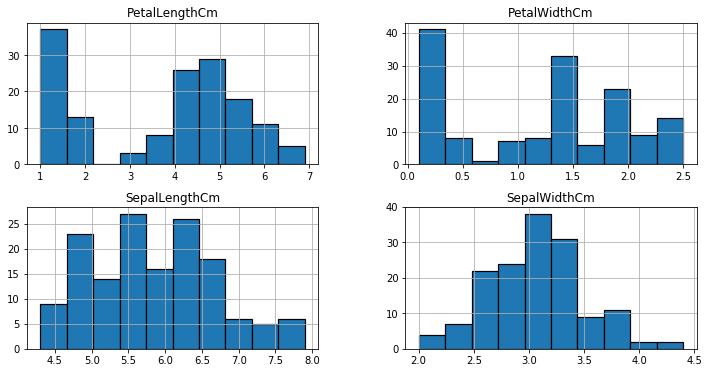

In [104]:
iris_new.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

## Data Visualizing

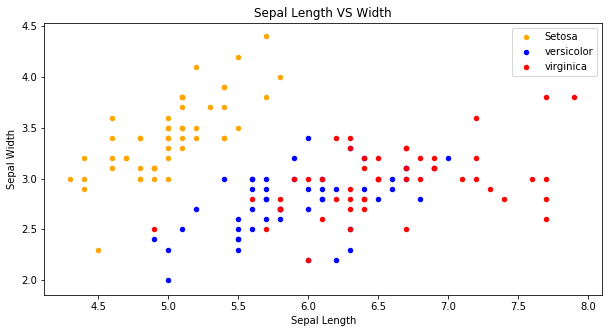

In [105]:
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='red', label='virginica', ax=fig)

fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")

fig=plt.gcf()
fig.set_size_inches(10,5)
plt.show()

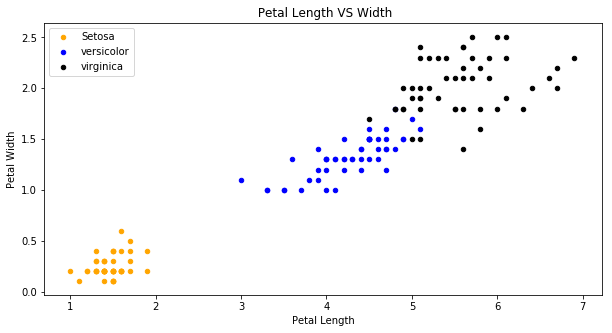

In [106]:
fig = iris[iris.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='black', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,5)
plt.show()

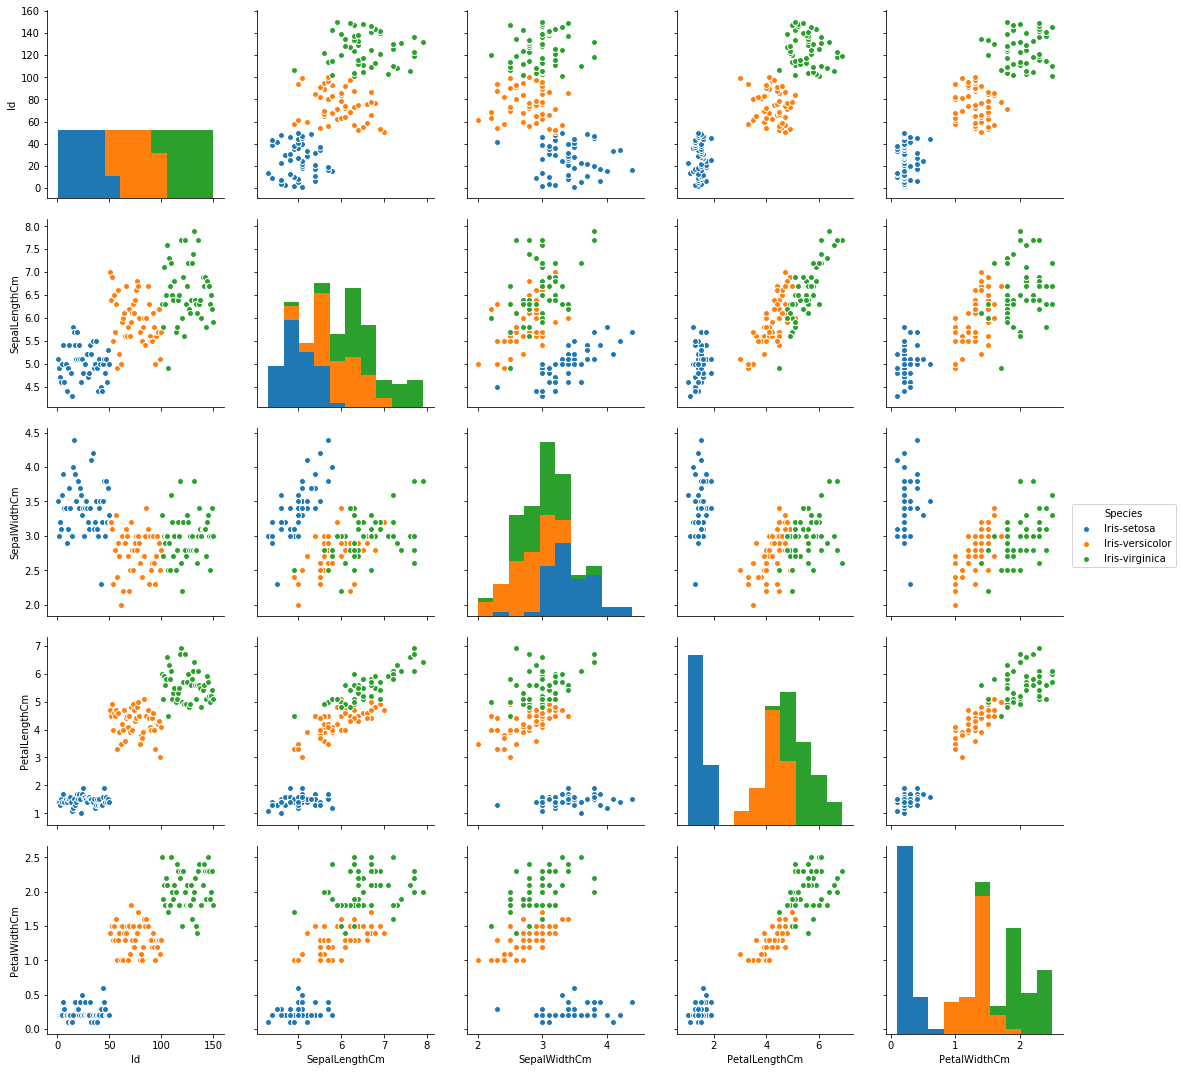

In [112]:
sb.pairplot(df, hue='Species', size=3)

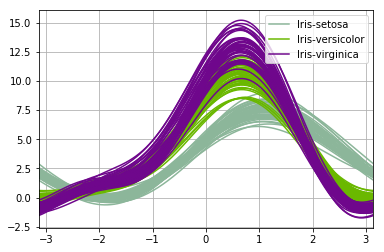

In [122]:
x = pd.plotting.andrews_curves(iris_new, 'Species')
  
# ploting the Curve
x.plot()
  
# Display
plt.show()

### Machine Learning

In [110]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.cross_validation import train_test_split #to split the dataset for training and testing
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm

Now, when we train any algorithm, the number of features and their correlation plays an important role.
If there are features and many of the features are highly correlated, then training an algorithm with all the featues
will reduce the accuracy. 
Thus features selection should be done carefully. 
This dataset has less featues but still we will see the correlation.

Correlation Matrix-->

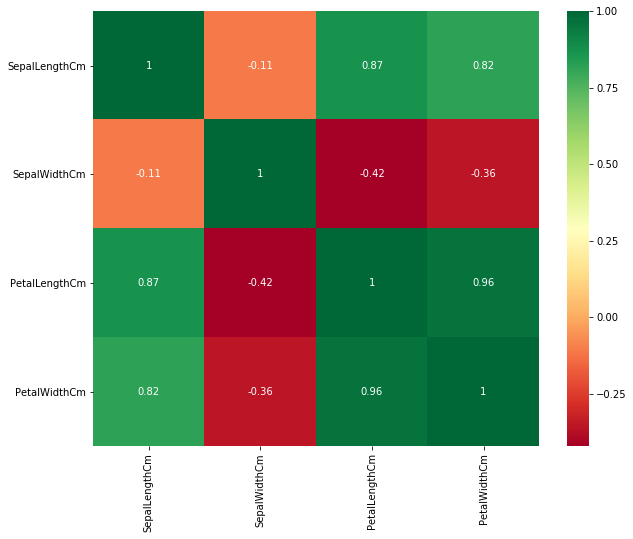

In [118]:
sns.heatmap(iris_new[iris_new.columns[:8]].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

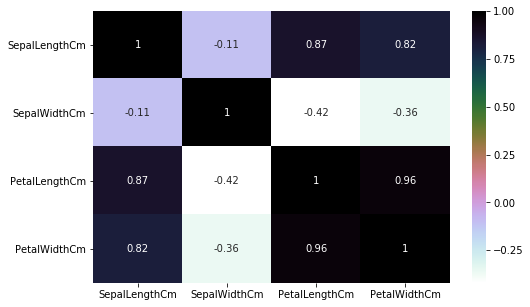

In [119]:
plt.figure(figsize=(8,5)) 
sb.heatmap(iris_new.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

Observation--->

The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated

We will use all the features for training the algorithm and check the accuracy.

Then we will use 1 Petal Feature and 1 Sepal Feature to check the accuracy of the algorithm as we are using only 2 features that are not correlated.
Thus we can have a variance in the dataset which may help in better accuracy. We will check it later.

### Steps To Be followed When Applying an Algorithm:
#### 1.Split the dataset into training and testing dataset. The testing dataset is generally smaller than training one as it will help in training the model better.
#### 2.Select any algorithm based on the problem (classification or regression) whatever you feel may be good.
#### 3.Then pass the training dataset to the algorithm to train it. We use the .fit() method
#### 4.Then pass the testing data to the trained algorithm to predict the outcome. We use the .predict() method.
#### 5.We then check the accuracy by passing the predicted outcome and the actual output to the model.

Splitting The Data into Training And Testing Dataset

In [80]:
train, test = train_test_split(iris_new, test_size = 0.3)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [81]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]# taking the training data features
train_y=train.Species# output of our training data
test_X= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data features
test_y =test.Species   #output value of test data

In [82]:
train_X.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
1,4.9,3.0,1.4,0.2
119,6.0,2.2,5.0,1.5
57,4.9,2.4,3.3,1.0
88,5.6,3.0,4.1,1.3
53,5.5,2.3,4.0,1.3


In [83]:
test_X.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
72,6.3,2.5,4.9,1.5
100,6.3,3.3,6.0,2.5
147,6.5,3.0,5.2,2.0
79,5.7,2.6,3.5,1.0
90,5.5,2.6,4.4,1.2


In [84]:
train_y.head()  ##output of the training data

1          Iris-setosa
119     Iris-virginica
57     Iris-versicolor
88     Iris-versicolor
53     Iris-versicolor
Name: Species, dtype: object

#### Support Vector Machine (SVM)

In [85]:
model = svm.SVC() #select the algorithm
model.fit(train_X,train_y) # we train the algorithm with the training data and the training output
prediction=model.predict(test_X) #now we pass the testing data to the trained algorithm
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,test_y))#now we check the accuracy of the algorithm. 
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is: 0.9777777777777777


#### Logistic Regression

In [86]:
model = LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Logistic Regression is 0.9555555555555556


#### Decision Tree

In [69]:
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Decision Tree is 0.9333333333333333


#### K-Nearest Neighbours

In [70]:
model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))

The accuracy of the KNN is 0.9555555555555556


Let's check the accuracy for various values of n for K-Nearest nerighbours

([<matplotlib.axis.XTick at 0x26f37896208>,
 <a list of 10 Text xticklabel objects>)

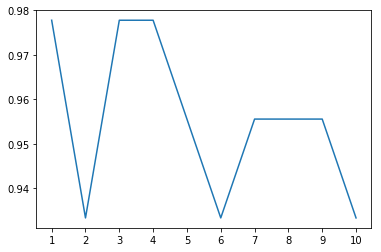

In [87]:
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_y)))
plt.plot(a_index, a)
plt.xticks(x)

Above is the graph showing the accuracy for the KNN models using different values of n.

We used all the features of iris in above models. Now we will use Petals and Sepals Seperately
Creating Petals And Sepals Training Data:--->

In [89]:
petal=iris_new[['PetalLengthCm','PetalWidthCm','Species']]
sepal=iris_new[['SepalLengthCm','SepalWidthCm','Species']]

In [90]:
train_p,test_p=train_test_split(petal,test_size=0.3,random_state=0)  #petals
train_x_p=train_p[['PetalWidthCm','PetalLengthCm']]
train_y_p=train_p.Species
test_x_p=test_p[['PetalWidthCm','PetalLengthCm']]
test_y_p=test_p.Species


train_s,test_s=train_test_split(sepal,test_size=0.3,random_state=0)  #Sepal
train_x_s=train_s[['SepalWidthCm','SepalLengthCm']]
train_y_s=train_s.Species
test_x_s=test_s[['SepalWidthCm','SepalLengthCm']]
test_y_s=test_s.Species

In [91]:
model=svm.SVC()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the SVM using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model=svm.SVC()
model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the SVM using Sepal is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the SVM using Petals is: 0.9777777777777777
The accuracy of the SVM using Sepal is: 0.8


In [92]:
model = LogisticRegression()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Logistic Regression using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Logistic Regression using Petals is: 0.6888888888888889
The accuracy of the Logistic Regression using Sepals is: 0.6444444444444445


In [93]:
model=DecisionTreeClassifier()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Decision Tree using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Decision Tree using Petals is: 0.9555555555555556
The accuracy of the Decision Tree using Sepals is: 0.6666666666666666


In [94]:
model=KNeighborsClassifier(n_neighbors=3) 
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the KNN using Petals is: 0.9777777777777777
The accuracy of the KNN using Sepals is: 0.7333333333333333


### Observations:
#### Using Petals over Sepal for training the data gives a much better accuracy.
#### This was expected as we saw in the heatmap above that the correlation between the Sepal Width and Length was very low whereas the correlation between Petal Width and Length was very high.

## Train and validate data (Machine learning)



#### Dividing the data for training and testing
##### Here, we’ll separate the dataset into two parts for validation processes such as train data and test data. Then allocating 80% of data for training tasks and the remainder 20% for validation purposes.

In [31]:

array=iris.values
X=array[: , 0 : 4]
Y=array[: , 4]

X_train, X_test, Y_train, Y_test=sklearn.model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)
# the test set size is specified to 0.2 (i.e. 20% of the data will go to the test set 
# whereas the remaining 80% to the training set) and the random seed number is set to 42.

# Training the model
##### Using some of the commonly used algorithms, we will be training our model to check how accurate every algorithm is: Logistic regression

In [45]:
#Logistic Regression

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)

#the .fit() function performs the actual model training on the input data X_train and Y_train.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
#Now that the model is built, we’re going to apply it to make predictions on the training set and test set as follows:
#in the below code, the model (lr) is applied to make predictions via the lr.predict() function on the training set and test set

In [47]:
Y_lr_train_pred = lr.predict(X_train)
Y_lr_test_pred = lr.predict(X_test)

In [48]:
#We’re now going to calculate the performance metrics so that we will be able to determine the model performance:
# we import the mean_squared_error and r2_score functions from the sklearn.metrics sub-module to compute the performance metrics.
#The input arguments for both functions are the actual Y values (Y) and the predicted Y values (Y_lr_train_pred and Y_lr_test_pred)

In [49]:
from sklearn.metrics import mean_squared_error, r2_score
lr_train_mse = mean_squared_error(Y_train, Y_lr_train_pred)
lr_train_r2 = r2_score(Y_train, Y_lr_train_pred)

lr_test_mse = mean_squared_error(Y_test, Y_lr_test_pred)
lr_test_r2 = r2_score(Y_test, Y_lr_test_pred)

In [50]:
print(lr_train_mse)

0.031031254749479088


In [51]:
lr_results = pd.DataFrame(['Linear regression',lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']

In [52]:
print(lr_results)

              Method Training MSE Training R2  Test MSE   Test R2
0  Linear regression    0.0310313    0.944877  0.034019  0.946482
